# DATA



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv("data/basic2.csv")
df.head()

,Unnamed: 0,Smoked,PhysInactive,Aritmia,waist,bodyfat,fvc,fev1,AnyMeds AN do AY,All_disease,...,CR_Code_4.0,CR_Code_5.0,ethnic_code_1.0,ethnic_code_2.0,ethnic_code_3.0,ethnic_code_4.0,ethnic_code_5.0,max_hr,vo2_l_min,vo2_ml_kg_min
0,0,0.0,1.0,0.0,0.333921,0.150895,0.452555,0.320819,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,5.15300,47.8
1,1,0.0,1.0,0.0,0.385551,0.300159,0.416058,0.462457,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,142.0,2.66304,45.6
2,2,0.0,0.0,0.0,0.385551,0.537049,0.416058,0.462457,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,160.0,2.64000,29.0
3,4,1.0,1.0,0.0,0.409780,0.259484,0.416058,0.462457,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,1.98000,22.9
4,5,0.0,0.0,0.0,0.385551,0.300159,0.108029,0.121160,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.96800,27.8


In [3]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

# LM max_hr

In [4]:
X = df.drop(['max_hr', 'vo2_l_min', 'vo2_ml_kg_min', 'Unnamed: 0'], axis=1)
y = df['max_hr']

In [5]:
X.head()

,Smoked,PhysInactive,Aritmia,waist,bodyfat,fvc,fev1,AnyMeds AN do AY,All_disease,resting_dbp,...,CR_Code_1.0,CR_Code_2.0,CR_Code_3.0,CR_Code_4.0,CR_Code_5.0,ethnic_code_1.0,ethnic_code_2.0,ethnic_code_3.0,ethnic_code_4.0,ethnic_code_5.0
0,0.0,1.0,0.0,0.333921,0.150895,0.452555,0.320819,0.0,0.0,0.525000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.385551,0.300159,0.416058,0.462457,0.0,1.0,0.484375,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.385551,0.537049,0.416058,0.462457,1.0,0.0,0.484375,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.409780,0.259484,0.416058,0.462457,1.0,1.0,0.425000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.385551,0.300159,0.108029,0.121160,0.0,0.0,0.275000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.head()

0    166.0
1    142.0
2    160.0
3    183.0
4    100.0
Name: max_hr, dtype: float64

# CROSSVALIDATION with all data

In [7]:
lm = LinearRegression()
scores = cross_validate(lm, X, y, cv=10, 
                        scoring=('r2'), 
                        return_train_score=True)

# print(1 - scores['test_r2'])
# scores with 95% accuracy
# print("RRMSE: %0.2f (+/- %0.2f)" % (1 - scores['test_r2'].mean(), scores['test_r2'].std() * 2))

In [8]:
scores

{'fit_time': array([0.16425848, 0.01396275, 0.01396251, 0.01296473, 0.01197004,
        0.0129652 , 0.0119679 , 0.01299667, 0.01399541, 0.012007  ]),
 'score_time': array([0.0039885 , 0.00302958, 0.00199485, 0.00103426, 0.00199485,
        0.00199533, 0.00199461, 0.00196195, 0.00200129, 0.00202417]),
 'test_score': array([ -3.56162753, -11.06562833, -20.27729836, -30.75045409,
        -29.73000233,   0.56036674, -15.76482745, -11.35041226,
        -14.32176638,  -7.34211052]),
 'train_score': array([0.56549605, 0.53957267, 0.52292978, 0.50491501, 0.47575189,
        0.45065369, 0.48093454, 0.51168595, 0.53975808, 0.57459488])}

In [9]:
clf = Lasso(alpha=0.1)

In [10]:
scores = cross_validate(clf, X, y, cv=10, 
                        scoring=('r2', 'neg_mean_squared_error'), 
                        return_train_score=True)

In [11]:
scores

{'fit_time': array([0.02197814, 0.01695442, 0.0129416 , 0.01196766, 0.01196814,
        0.0129652 , 0.01196814, 0.01196861, 0.01196861, 0.01196861]),
 'score_time': array([0.00199318, 0.00299215, 0.00199437, 0.00199461, 0.00199413,
        0.00299191, 0.00299215, 0.00299168, 0.00199461, 0.00199413]),
 'test_r2': array([ -3.39763491, -10.0172957 , -18.34239029, -30.19272092,
        -32.39006914,   0.50431574, -17.5704557 , -10.42698543,
        -11.54976669,  -7.88369828]),
 'train_r2': array([0.54956382, 0.52821496, 0.51070614, 0.492298  , 0.46174822,
        0.43303547, 0.46668602, 0.49838314, 0.52578689, 0.56036786]),
 'test_neg_mean_squared_error': array([-368.77043197,  -97.90322174,  -84.25153036, -129.6886753 ,
        -240.53802494, -814.40959816, -366.06391021, -103.83161179,
        -101.47102709, -383.58343728]),
 'train_neg_mean_squared_error': array([-193.86348197, -216.7718621 , -218.41745394, -214.1926945 ,
        -206.0034745 , -156.90551509, -196.17182815, -216.888970

Build model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
reg = lm.fit(X_train, y_train)
reg.coef_

array([-5.85526526e+00,  7.70800640e+00,  3.69697787e+00,  1.16230537e+01,
       -1.18619549e+00,  4.72328344e-01,  4.71465051e+00, -2.50842450e+00,
        6.63720291e-01, -4.18205841e-02,  6.76168307e+00,  2.33945294e+01,
        7.96120395e+00, -3.52274262e+01,  1.69851762e+01, -4.56863702e+01,
       -1.65461489e+00, -2.87164670e+00,  1.28592951e+01, -4.43201373e+00,
        2.01280296e+01, -2.37382077e+00, -6.79218734e+00, -6.02090870e+00,
       -8.24292505e+00, -5.77138545e+00, -6.74028614e+00])

In [13]:
y_pred = reg.predict(X_test)
RRMSE_max_hr = 1 - r2_score(y_test, y_pred)
print(RRMSE_max_hr)

0.4728844022172525


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
reg = clf.fit(X_train, y_train)
reg.coef_

array([ -3.79688263,   6.55353599,   0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,  -2.4996638 ,
         0.        ,   0.        ,   0.        ,  13.67687209,
        -0.        ,  -4.30314275,  -0.        , -41.97324887,
        -2.38872816,  -2.95567776,  12.9042888 ,  -3.0678952 ,
        20.4823549 ,  -0.        ,  -5.54386238,  -0.        ,
        -0.        ,  -0.90631053,  -0.        ])

In [16]:
print(X.columns[reg.coef_ != 0])
print(reg.coef_[reg.coef_ != 0])

Index(['Smoked', 'PhysInactive', 'AnyMeds AN do AY ', 'resting_hr',
       'weight Ib->kg', 'ageattest', 'Gender_Male', 'CR_Code_1.0',
       'CR_Code_2.0', 'CR_Code_3.0', 'CR_Code_4.0', 'ethnic_code_1.0',
       'ethnic_code_4.0'],
      dtype='object')
[ -3.79688263   6.55353599  -2.4996638   13.67687209  -4.30314275
 -41.97324887  -2.38872816  -2.95567776  12.9042888   -3.0678952
  20.4823549   -5.54386238  -0.90631053]


In [38]:
fs = {X.columns[reg.coef_ != 0][i]: reg.coef_[reg.coef_ != 0][i] for i in range(len(X.columns[reg.coef_ != 0]))}
fs = {k: v for k, v in sorted(fs.items(), key=lambda item: item[1])}

pd.DataFrame.from_dict(fs, orient='index', columns=['weights'])

,weights
ageattest,-41.973249
ethnic_code_1.0,-5.543862
weight Ib->kg,-4.303143
Smoked,-3.796883
CR_Code_3.0,-3.067895
CR_Code_1.0,-2.955678
AnyMeds AN do AY,-2.499664
Gender_Male,-2.388728
ethnic_code_4.0,-0.906311
PhysInactive,6.553536


In [15]:
y_pred = reg.predict(X_test)
RRMSE_max_hr = 1 - r2_score(y_test, y_pred)
print(RRMSE_max_hr)

0.48905774760864573


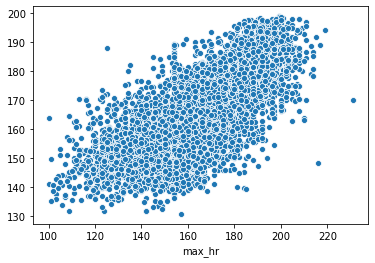

In [16]:
# Scatter
sns.scatterplot(x = y_test, y = y_pred)

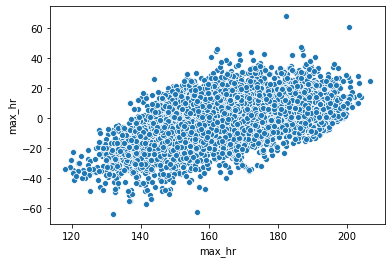

In [116]:
# BLAND-ALTMAN plot
sns.scatterplot(x=((y_pred + y_test) / 2), y=(y_test - y_pred))

In [25]:
def test_cv(learner, X, y, k=5):
    N = len(y)
    first = N % k
    first_n = int(N / k) + 1
    n = int(N / k)

    # print(N, first, first_n, n)

    shape = X.shape
    shuffle = np.zeros((shape[0], shape[1] + 1))
    shuffle[:, :-1] = X
    shuffle[:, -1] = y

    # np.random.shuffle(shuffle)
    per = np.random.permutation(N)

    pred = np.zeros([N, 1])

    for i in range(0, k):
        if i < first:
            from_i = i * first_n
            to_i = (i + 1) * first_n
            # print(i * first_n, (i + 1) * first_n)
        else:
            from_i = (first * first_n) + (i - first) * n
            to_i = (first * first_n) + (i - first + 1) * n
            # print((first * first_n) + (i - first) * n, (first * first_n) + (i - first + 1) * n)

        Xi_train = np.delete(shuffle, np.s_[per[from_i:to_i]], 0)
        Xi_test = shuffle[per[from_i:to_i]]

        c = learner.fit(Xi_train[:, :-1], Xi_train[:, -1])
        
        pred[per[from_i:to_i]] = np.array(c.predict(Xi_test[:, :-1])).reshape(len(pred[per[from_i:to_i]]), 1)
        RRMSE_max_hr = 1 - r2_score(y[per[from_i:to_i]], pred[per[from_i:to_i]])
        print(RRMSE_max_hr)

    return pred

In [31]:
res_corr = test_cv(clf, X, y, k=10)
RRMSE_max_hr = 1 - r2_score(y, res_corr)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE_max_hr)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y, res_corr)))

0.48239474619773914
0.5052501740901937
0.48949797110203286
0.492437141545504
0.48337124913048446
0.4929647825233734
0.5121984263004914
0.5052842737334778
0.49615749617427896
0.5119391797872791
------------------------------
OVERALL RRMSE
0.4968431494784369
OVERALL RMSE
14.3620911339384


In [32]:
from itertools import chain 
y_res = list(chain.from_iterable(res_corr))
math.sqrt(sum((y - y_res)**2) / len(y))

14.362091133938447

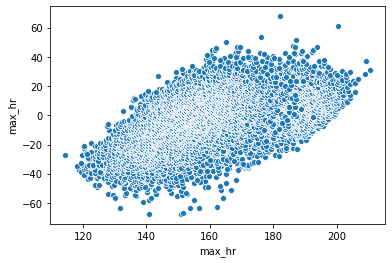

In [33]:
# BLAND-ALTMAN plot
sns.scatterplot(x=((y + y_res) / 2), y=(y - y_res))

# LM vo2_l_min

**RReliafF feature selection for vo2_l_min**

waist                     --> 0.009569

bodyfat                   --> 0.014413

fvc                       --> 0.018686

Aritmia                   --> 0.020000

BMI                       --> 0.021262

fev1                      --> 0.021502

weight Ib->kg             --> 0.022448

resting_sbp               --> 0.032925

height inch->cm           --> 0.034091

resting_dbp               --> 0.035906

resting_hr                --> 0.043977

ageattest                 --> 0.045552

In [71]:
X = df[['waist', 'bodyfat', 'fvc', 'Aritmia', 'BMI', 'fev1', 'weight Ib->kg', 'height inch->cm', 'resting_dbp', 'resting_hr', 'resting_sbp', 'ageattest']]
y = df['vo2_l_min']

In [72]:
X.head()

,waist,bodyfat,fvc,Aritmia,BMI,fev1,weight Ib->kg,height inch->cm,resting_dbp,resting_hr,resting_sbp,ageattest
0,0.333921,0.150895,0.452555,0.0,0.218599,0.320819,0.268406,0.666821,0.525000,0.318182,0.381818,0.322812
1,0.385551,0.300159,0.416058,0.0,0.455874,0.462457,0.291403,0.254439,0.484375,0.456250,0.380273,0.509326
2,0.385551,0.537049,0.416058,0.0,0.393582,0.462457,0.216546,0.208275,0.484375,0.456250,0.380273,0.609756
3,0.409780,0.259484,0.416058,0.0,0.198994,0.462457,0.237614,0.647059,0.425000,0.409091,0.345455,0.552367
4,0.385551,0.300159,0.108029,0.0,0.140066,0.121160,0.016438,0.215686,0.275000,0.318182,0.409091,0.853659


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

# CV
lm = LinearRegression()
scores = cross_validate(lm, X_train, y_train, cv=5, 
                        scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(1 - scores['test_r2'])
# scores with 95% accuracy
print("RRMSE: %0.2f (+/- %0.2f)" % (1 - scores['test_r2'].mean(), scores['test_r2'].std() * 2))

[0.9752     0.99085017 0.97199526 0.98012859 0.97710082]
RRMSE: 0.98 (+/- 0.01)


In [74]:
reg = lm.fit(X_train, y_train)
reg.coef_

array([ 0.21278919, -0.11696934, -0.63745575,  0.19109964,  1.36310879,
       -0.27938314, -1.07357665,  0.85932926,  0.30930206,  0.34302431,
       -0.14364983, -0.47558896])

In [75]:
y_pred = reg.predict(X_test)
RRMSE_vo2_l_min = 1 - r2_score(y_test, y_pred)
print(RRMSE_vo2_l_min)

0.9772363359022828


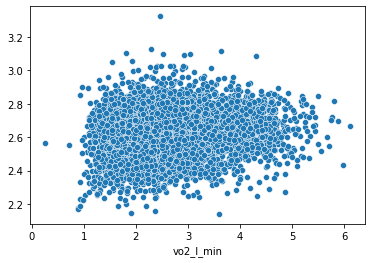

In [76]:
# Scatter
sns.scatterplot(x = y_test, y = y_pred)

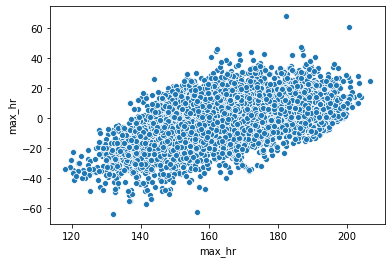

In [30]:
# BLAND-ALTMAN plot
sns.scatterplot(x=((y_pred + y_test) / 2), y=(y_test - y_pred))

1.000692883574531
1.0000575070350828
1.0000124246938198
1.000960164833333
1.0000392720874864
1.0002583656827688
1.0020394195247622
1.0004681420766177
1.0003915609410254
1.0000478158332151
------------------------------
OVERALL RRMSE
1.0000958246592315
OVERALL RMSE
0.845329423633969


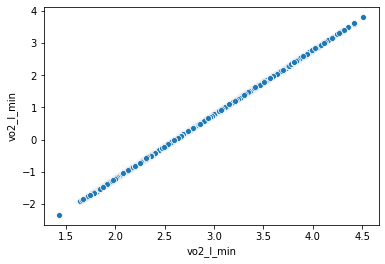

In [51]:
clf = Lasso(alpha=0.1)
y = df['vo2_l_min']

res_vo2lmin = test_cv(clf, X, y, k=10)
RRMSE_vo2lmin = 1 - r2_score(y, res_vo2lmin)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE_vo2lmin)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y, res_vo2lmin)))

y_res = list(chain.from_iterable(res_vo2lmin))

sns.scatterplot(x=((y + y_res) / 2), y=(y - y_res))

In [52]:
y



0        5.15300
1        2.66304
2        2.64000
3        1.98000
4        1.96800
          ...   
21329    3.70000
21330    1.89000
21331    2.59000
21332    3.54000
21333    5.01400
Name: vo2_l_min, Length: 21334, dtype: float64

In [54]:
y_res

[2.6079232562500003,
 2.605601728034998,
 2.6033960871829596,
 2.6078092568095417,
 2.6069921171874997,
 2.6059148638091765,
 2.606697474089891,
 2.6059148638091765,
 2.6059148638091765,
 2.606697474089891,
 2.6059148638091765,
 2.6094904213541668,
 2.605601728034998,
 2.6099111182291668,
 2.6059148638091765,
 2.6059148638091765,
 2.609109240664549,
 2.6094904213541668,
 2.6099111182291668,
 2.6099111182291668,
 2.6059148638091765,
 2.6099111182291668,
 2.606697474089891,
 2.606697474089891,
 2.609109240664549,
 2.6094904213541668,
 2.6094904213541668,
 2.606697474089891,
 2.6094904213541668,
 2.6059148638091765,
 2.6069921171874997,
 2.6069921171874997,
 2.605601728034998,
 2.6033960871829596,
 2.606697474089891,
 2.6099111182291668,
 2.6099111182291668,
 2.6078092568095417,
 2.6079232562500003,
 2.6069921171874997,
 2.6094904213541668,
 2.6078092568095417,
 2.6059148638091765,
 2.6033960871829596,
 2.606697474089891,
 2.609109240664549,
 2.6079232562500003,
 2.6079232562500003,
 2.60

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
reg = clf.fit(X_train, y_train)
reg.coef_

array([-0., -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,
       -0.])

# LM vo2_ml_kg_min


**RReliafF feature selection for vo2_ml_kg_min**

bodyfat                   --> 0.010269

waist                     --> 0.013436

fvc                       --> 0.017051

fev1                      --> 0.017201

weight Ib->kg             --> 0.025120

BMI                       --> 0.027779

height inch->cm           --> 0.032523

resting_dbp               --> 0.036281

resting_sbp               --> 0.041045

ageattest                 --> 0.048465

resting_hr                --> 0.050000

In [80]:
X = df[['waist', 'bodyfat', 'fvc', 'BMI', 'fev1', 'weight Ib->kg', 'height inch->cm', 'resting_dbp', 'resting_hr', 'resting_sbp', 'ageattest']]
y = df['vo2_ml_kg_min']

In [81]:
X.head()

,waist,bodyfat,fvc,BMI,fev1,weight Ib->kg,height inch->cm,resting_dbp,resting_hr,resting_sbp,ageattest
0,0.333921,0.150895,0.452555,0.218599,0.320819,0.268406,0.666821,0.525000,0.318182,0.381818,0.322812
1,0.385551,0.300159,0.416058,0.455874,0.462457,0.291403,0.254439,0.484375,0.456250,0.380273,0.509326
2,0.385551,0.537049,0.416058,0.393582,0.462457,0.216546,0.208275,0.484375,0.456250,0.380273,0.609756
3,0.409780,0.259484,0.416058,0.198994,0.462457,0.237614,0.647059,0.425000,0.409091,0.345455,0.552367
4,0.385551,0.300159,0.108029,0.140066,0.121160,0.016438,0.215686,0.275000,0.318182,0.409091,0.853659


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

# CV
lm = LinearRegression()
scores = cross_validate(lm, X_train, y_train, cv=5, 
                        scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(1 - scores['test_r2'])
# scores with 95% accuracy
print("RRMSE: %0.2f (+/- %0.2f)" % (1 - scores['test_r2'].mean(), scores['test_r2'].std() * 2))

[0.96660276 0.98503153 0.96996955 0.97852473 0.97506641]
RRMSE: 0.98 (+/- 0.01)


In [83]:
reg = lm.fit(X_train, y_train)
reg.coef_

array([  1.82850958,  -4.6705756 ,  -7.70157862,  17.9254313 ,
        -4.29817968, -13.15803103,  10.48502586,   4.51515901,
         6.81021611,  -1.88440833,  -5.92002292])

In [84]:
y_pred = reg.predict(X_test)
RRMSE_vo2_l_min = 1 - r2_score(y_test, y_pred)
print(RRMSE_vo2_l_min)

0.974304541018899


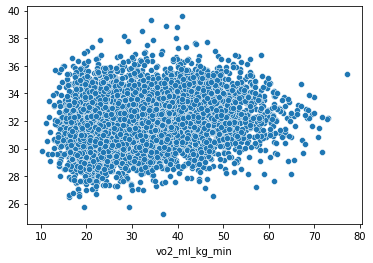

In [85]:
# Scatter
sns.scatterplot(x = y_test, y = y_pred)

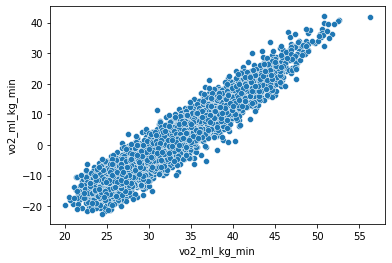

In [86]:
# BLAND-ALTMAN plot
sns.scatterplot(x=((y_pred + y_test) / 2), y=(y_test - y_pred))

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

0.4207766650902891
0.40525965317997636
0.42348268203621175
0.40584010510206936
0.4277235066205408
0.39044326256546213
0.417323304519037
0.4206223650176122
0.4233803590253036
0.4332341969790314
------------------------------
OVERALL RRMSE
0.4165857036939675
OVERALL RMSE
13.151043250655091


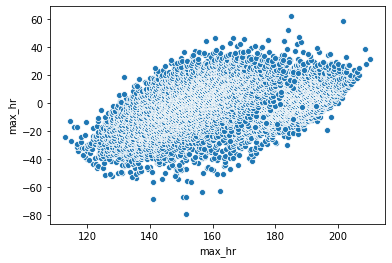

In [71]:
regr = RandomForestRegressor(n_estimators=250, max_depth=10, random_state=0)
y = df['max_hr']

res_vo2lmin = test_cv(regr, X, y, k=10)
RRMSE_vo2lmin = 1 - r2_score(y, res_vo2lmin)
print("------------------------------")
print("OVERALL RRMSE")
print(RRMSE_vo2lmin)
print("OVERALL RMSE")
print(math.sqrt(mean_squared_error(y, res_vo2lmin)))

y_res = list(chain.from_iterable(res_vo2lmin))

sns.scatterplot(x=((y + y_res) / 2), y=(y - y_res))

NameError: name 'RandomForestRegressor' is not defined